## MNIST handwritten digits prediction

<img src="https://miro.medium.com/max/800/1*LyRlX__08q40UJohhJG9Ow.png" align="left" width="600">

### Import Python libraries

In [7]:
# Required libraries:
# !pip install numpy
# !pip install matplotlib
# !pip install tensorflow

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### Prepare the data

In [8]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# The data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Show single handwritten digits

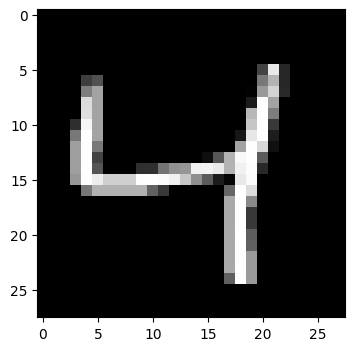

In [9]:
import matplotlib.pyplot as plt

image  = X_train[2] # Change index in [] to show other digits
fig    = plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.show()

In [10]:
X_train[2].shape

(28, 28, 1)

### Initialize the model

In [11]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# model.summary()

### Train the model

In [12]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 20s 46ms/step - loss: 0.3596 - accuracy: 0.8912 - val_loss: 0.0851 - val_accuracy: 0.9777
Epoch 2/5
422/422 [==============================] - 20s 48ms/step - loss: 0.1097 - accuracy: 0.9680 - val_loss: 0.0604 - val_accuracy: 0.9825
Epoch 3/5
422/422 [==============================] - 21s 49ms/step - loss: 0.0817 - accuracy: 0.9746 - val_loss: 0.0450 - val_accuracy: 0.9867
Epoch 4/5
422/422 [==============================] - 18s 44ms/step - loss: 0.0724 - accuracy: 0.9778 - val_loss: 0.0386 - val_accuracy: 0.9900
Epoch 5/5
422/422 [==============================] - 20s 48ms/step - loss: 0.0620 - accuracy: 0.9811 - val_loss: 0.0372 - val_accuracy: 0.9898


### Evaluate the trained model

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03651832789182663
Test accuracy: 0.9878000020980835


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')